In [25]:
#importing libraries
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt 
import seaborn as sns
import requests
%matplotlib inline

In [26]:
#dataset loader function and loading
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print('Successfully loaded')
df.head()

Successfully loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Hours Vs Scores')

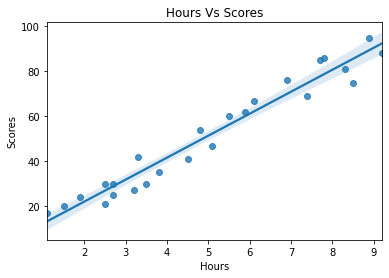

In [27]:
#Plotting between variables for finding any relationship
plot = sns.regplot(x='Hours',y='Scores',data=df)
plot.set_title("Hours Vs Scores")

#### We can conclude from the graph above that Hours and Score have positive linear relation. 

In [28]:
#checking the count of if any NAN present
df.isna().sum()

Hours     0
Scores    0
dtype: int64

We can see that no any NAN values are present in our dataset.

In [55]:
#Extracting the input columns from dataframe
X = df.drop('Scores',axis='columns',inplace=False)

In [62]:
#Extracting the output column from dataframe
y = df['Scores']

In [63]:
#splitting the input and output into train and test data
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [64]:
print(X_train.shape , X_test.shape ,y_train.shape , y_test.shape)

(18, 1) (7, 1) (18,) (7,)


#### We have splittted our data into training and testing sets, and now is finally the time to train our algorithm. 

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print('Trained Successful')

Trained Successful


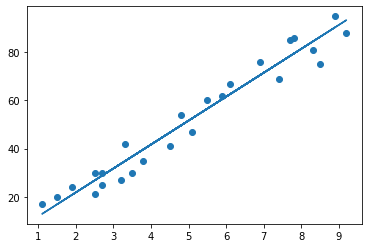

In [69]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X.values, y.values)
plt.plot(X.values, line);
plt.show()

In [70]:
#Now predicting the output for test data
predicted = lin_reg.predict(X_test)

In [71]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df 

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [74]:
#What will be predicted score if a student studies for 9.25 hrs/ day?hours = 9.25
hours_per_day = 9.25
prediction = lin_reg.predict([[hours_per_day]])
print("No of Hours = {}".format(hours_per_day))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I am using the accuracy score() method. There are many such metrics.

In [75]:
score = lin_reg.score(X_test,y_test)
print('Accuracy for Prediction using LinearRgression is {}'.format(score*100))

Accuracy for Prediction using LinearRgression is 93.67661043365057


# Thank You